# Start

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Data.CodonTable import unambiguous_dna_by_id
from Bio.SeqUtils import seq3
from Bio.SeqFeature import CompoundLocation

In [150]:
helix_df = pd.read_csv(r'C:\Work\Lab\pr-29-trna-or-mutagenesis\raw\HelixMTdb_20200327.tsv', sep='\t').copy()
helix_df

,locus,alleles,feature,gene,counts_hom,AF_hom,counts_het,AF_het,mean_ARF,max_ARF,haplogroups_for_homoplasmic_variants,haplogroups_for_heteroplasmic_variants
0,chrM:5,"[""A"",""C""]",non_coding,MT-CRb,1,0.000005,0,0.000000,NaN,NaN,"[[""H"",1]]",[]
1,chrM:10,"[""T"",""C""]",non_coding,MT-CRb,7,0.000036,1,0.000005,0.91892,0.91892,"[[""H"",7]]","[[""H"",1]]"
2,chrM:11,"[""C"",""T""]",non_coding,MT-CRb,0,0.000000,1,0.000005,0.60714,0.60714,[],"[[""H"",1]]"
3,chrM:12,"[""T"",""C""]",non_coding,MT-CRb,1,0.000005,0,0.000000,NaN,NaN,"[[""D"",1]]",[]
4,chrM:16,"[""A"",""T""]",non_coding,MT-CRb,273,0.001393,4,0.000020,0.68971,0.92188,"[[""K"",246],[""U"",12],[""H"",7],[""V"",2],[""B"",1],[""...","[[""K"",2],[""L3"",1],[""U"",1]]"
...,...,...,...,...,...,...,...,...,...,...,...,...
14319,chrM:16558,"[""G"",""A""]",non_coding,MT-CR,3,0.000015,0,0.000000,NaN,NaN,"[[""J"",3]]",[]
14320,chrM:16559,"[""A"",""G""]",non_coding,MT-CR,9,0.000046,0,0.000000,NaN,NaN,"[[""A"",3],[""K"",3],[""H"",2],[""B"",1]]",[]
14321,chrM:16562,"[""T"",""C""]",non_coding,MT-CR,0,0.000000,1,0.000005,0.85714,0.85714,[],"[[""U"",1]]"
14322,chrM:16564,"[""A"",""G""]",non_coding,MT-CR,0,0.000000,1,0.000005,0.70000,0.70000,[],"[[""H"",1]]"


In [43]:
helix_df_singleton = helix_df[helix_df[['counts_het', 'counts_hom']].sum(axis=1) == 1]
helix_df_2_001 = helix_df[(helix_df[['counts_het', 'counts_hom']].sum(axis=1) > 1) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.0001)]
helix_df_001_01 = helix_df[(helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.0001) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.001)]
helix_df_01_1 = helix_df[(helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.001) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.01)]
helix_df_1_10 = helix_df[(helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.01) & (helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.1)]
helix_df_10_ = helix_df[helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.1]
helix_dfs = {'singleton':helix_df_singleton, '2-0.1%':helix_df_2_001, '0.01-0.1%':helix_df_001_01, '0.1-1%':helix_df_01_1, '1-10%':helix_df_1_10, '>10%':helix_df_10_}4

# values_list = []
# for df in helix_dfs.values():
#     values_list.append(len(df))
list(map(len, helix_dfs.values()))

[3385, 6015, 3502, 1122, 265, 35]

In [79]:
# selecting rows in the df with only 12 basic substitutions in 'alleles' column
substitutions = []
for mut in helix_df.alleles.unique():
    mut_split = mut[1:-1].split(',')
    if len(mut_split) > 2:
        continue
    if len(mut_split[0])==3 and len(mut_split[-1])==3:
        substitutions.append(mut)

only_subs_helix_df = helix_df[(helix_df.alleles.isin(substitutions)) & (helix_df.feature != 'non_coding')]
len(only_subs_helix_df)

12027

In [73]:
only_subs_helix_df_singleton = only_subs_helix_df[only_subs_helix_df[['counts_het', 'counts_hom']].sum(axis=1) == 1]
only_subs_helix_df_2_001 = only_subs_helix_df[(only_subs_helix_df[['counts_het', 'counts_hom']].sum(axis=1) > 1) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.0001)]
only_subs_helix_df_001_01 = only_subs_helix_df[(only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.0001) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.001)]
only_subs_helix_df_01_1 = only_subs_helix_df[(only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.001) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.01)]
only_subs_helix_df_1_10 = only_subs_helix_df[(only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.01) & (only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) <= 0.1)]
only_subs_helix_df_10_ = only_subs_helix_df[only_subs_helix_df[['AF_hom', 'AF_het']].sum(axis=1) > 0.1]
only_subs_helix_dfs = {'singleton':only_subs_helix_df_singleton, '2-0.1%':only_subs_helix_df_2_001, '0.01-0.1%':only_subs_helix_df_001_01, '0.1-1%':only_subs_helix_df_01_1, '1-10%':only_subs_helix_df_1_10, '>10%':only_subs_helix_df_10_}
list(map(len, only_subs_helix_dfs.values()))

[3385, 6015, 3502, 1122, 265, 35]

In [149]:
only_subs_helix_df.gene.unique()

array(['MT-TF', 'MT-RNR1', 'MT-TV', 'MT-RNR2', 'MT-TL1', 'MT-ND1',
       'MT-TI', 'MT-TQ', 'MT-TM', 'MT-ND2', 'MT-TW', 'MT-TA', 'MT-TN',
       'MT-TC', 'MT-TY', 'MT-CO1', 'MT-TS1', 'MT-TD', 'MT-CO2', 'MT-TK',
       'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-TG', 'MT-ND3', 'MT-TR',
       'MT-ND4L', 'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5',
       'MT-ND6', 'MT-TE', 'MT-CYB', 'MT-TT', 'MT-TP'], dtype=object)

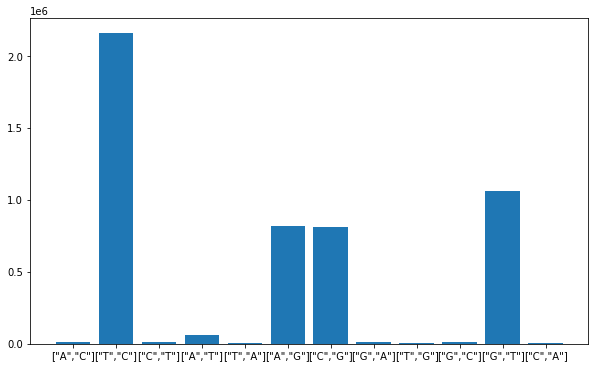

In [70]:
subs_number = only_subs_helix_df.groupby('alleles').sum(numeric_only=True).loc[:,['counts_hom', 'counts_het']].sum(axis=1)
plt.figure(figsize=(10,6))
plt.bar(x=substitutions, height=subs_number)
plt.show()

# RefSeq

In [191]:
refseq = SeqIO.read(r"C:\Work\Lab\pr-29-trna-or-mutagenesis\raw\helixMT Reference.gb", "genbank")

In [135]:
rCRS_annotation = []
for refseq_feature in refseq.features[1:]:
    if refseq_feature.type not in ['gene', 'misc_feature']:
        rCRS_annotation.append(refseq_feature)
    # print(refseq_feature.type)
    # locations_list.append(refseq_feature.location)
    # print(refseq_feature.location)
    # print(refseq_feature.qualifiers.keys())
rCRS_annotation

[SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(0), ExactPosition(576), strand=-1), FeatureLocation(ExactPosition(16023), ExactPosition(16569), strand=-1)], 'join'), type='D-loop', location_operator='join'),
 SeqFeature(FeatureLocation(ExactPosition(576), ExactPosition(647), strand=1), type='tRNA'),
 SeqFeature(FeatureLocation(ExactPosition(647), ExactPosition(1601), strand=1), type='rRNA'),
 SeqFeature(FeatureLocation(ExactPosition(1601), ExactPosition(1670), strand=1), type='tRNA'),
 SeqFeature(FeatureLocation(ExactPosition(1670), ExactPosition(3229), strand=1), type='rRNA'),
 SeqFeature(FeatureLocation(ExactPosition(3229), ExactPosition(3304), strand=1), type='tRNA'),
 SeqFeature(FeatureLocation(ExactPosition(3306), ExactPosition(4262), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(4262), ExactPosition(4331), strand=1), type='tRNA'),
 SeqFeature(FeatureLocation(ExactPosition(4328), ExactPosition(4400), strand=-1), type='tRNA'),
 SeqFeature(FeatureLoca

In [196]:
locations_list = {}
for refseq_feature in rCRS_annotation:
    if isinstance(refseq_feature.location, CompoundLocation):
        for refseq_feature_part in refseq_feature.location.parts:
            start = refseq_feature_part.nofuzzy_start
            end = refseq_feature_part.nofuzzy_end
            try:
                gene_name = refseq_feature.qualifiers['gene_synonym']
            except KeyError:
                gene_name = refseq_feature.type
            locations_list[f'{start}-{end}'] = gene_name
    else:
        start = refseq_feature.location.nofuzzy_start
        end = refseq_feature.location.nofuzzy_end
        gene_name = refseq_feature.qualifiers['gene_synonym']
        locations_list[f'{start}-{end}'] = gene_name
locations_list

{'0-576': 'D-loop',
 '16023-16569': 'D-loop',
 '576-647': ['MTTF'],
 '647-1601': ['MTRNR1'],
 '1601-1670': ['MTTV'],
 '1670-3229': ['MTRNR2'],
 '3229-3304': ['MTTL1'],
 '3306-4262': ['MTND1'],
 '4262-4331': ['MTTI'],
 '4328-4400': ['MTTQ'],
 '4401-4469': ['MTTM'],
 '4469-5511': ['MTND2'],
 '5511-5579': ['MTTW'],
 '5586-5655': ['MTTA'],
 '5656-5729': ['MTTN'],
 '5760-5826': ['MTTC'],
 '5825-5891': ['MTTY'],
 '5903-7445': ['COI', 'MTCO1'],
 '7445-7514': ['MTTS1'],
 '7517-7585': ['MTTD'],
 '7585-8269': ['COII', 'MTCO2'],
 '8294-8364': ['MTTK'],
 '8365-8572': ['ATPase8', 'MTATP8'],
 '8526-9207': ['ATPase6', 'MTATP6'],
 '9206-9990': ['COIII', 'MTCO3'],
 '9990-10058': ['MTTG'],
 '10058-10404': ['MTND3'],
 '10404-10469': ['MTTR'],
 '10469-10766': ['MTND4L'],
 '10759-12137': ['MTND4'],
 '12137-12206': ['MTTH'],
 '12206-12265': ['MTTS2'],
 '12265-12336': ['MTTL2'],
 '12336-14148': ['MTND5'],
 '14148-14673': ['MTND6'],
 '14673-14742': ['MTTE'],
 '14746-15887': ['MTCYB'],
 '15887-15953': ['MTTT']

In [173]:
rCRS_annotation[0].qualifiers == 

False